In [1]:
# !pip install opencv-python
#!pip install pillow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin= dataset_url, cache_dir='.', untar=True)

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count


3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:10]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg')]

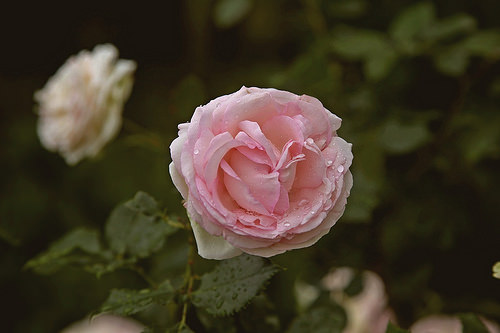

In [8]:
PIL.Image.open(str(roses[100]))

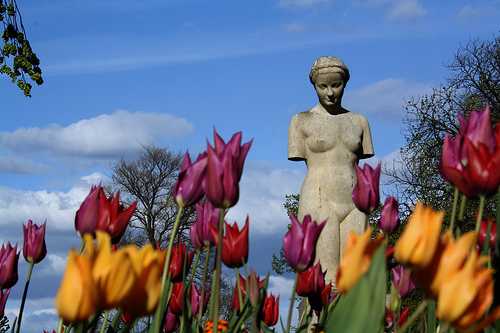

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[100]))

In [10]:
flowers_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [11]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [12]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [13]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [14]:
x, y = [],[]

for flower_name, images in flowers_image_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
x = np.array(x)
y = np.array(y)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [17]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [18]:
num_classes = 5

# CNN = Sequential([
#     layers.Conv2D(16, 3, padding='same', activation= 'relu'),
#     layers.MaxPooling2D(),
    
#     layers.Conv2D(32, 3, padding='same', activation= 'relu'),
#     layers.MaxPooling2D(),
    
#     layers.Conv2D(64, 3, padding='same', activation= 'relu'),
#     layers.MaxPooling2D(),
    
#     layers.Flatten(),
    
#     layers.Dense(128, activation = 'relu'),
#     layers.Dense(num_classes)
# ])

# CNN.compile(optimizer = 'adam',
#              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
#              metrics = ['accuracy'])

In [19]:
# CNN.fit(x_train_scaled, y_train, epochs = 15)

In [20]:
#overfitting happened

# CNN.evaluate(x_test_scaled, y_test)

In [21]:
# predection = CNN.predict(x_test_scaled)
# predection

In [22]:
# score  = tf.nn.softmax(predection[0])
# score


In [23]:
# np.argmax(score)

In [24]:
# y_test[0]

In [25]:
#improving the overfitting
img_height = 180
img_width = 180


data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height,img_width,3)), 
                                                              
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    
])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


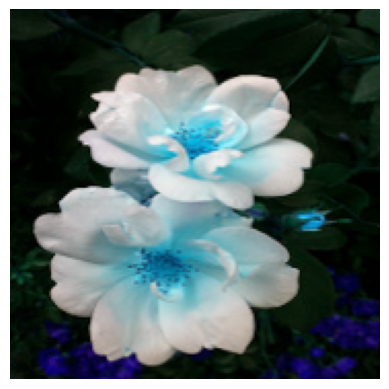

In [26]:
#original image

plt.axis('off')
plt.imshow(x[0])

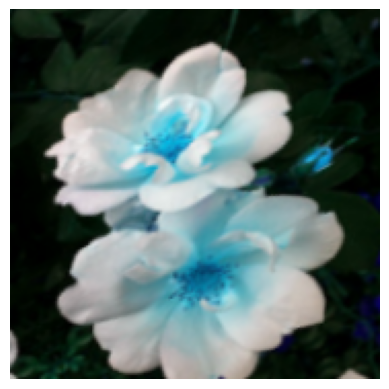

In [27]:
#agumented images

plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [28]:
num_classes = 5

CNN_agu = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

CNN_agu.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics = ['accuracy'])

In [30]:
CNN_agu.fit(x_train_scaled, y_train, epochs = 15)

Epoch 1/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 251ms/step - accuracy: 0.3327 - loss: 1.5792
Epoch 2/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 243ms/step - accuracy: 0.5723 - loss: 1.0855
Epoch 3/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 240ms/step - accuracy: 0.6187 - loss: 0.9646
Epoch 4/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - accuracy: 0.6365 - loss: 0.9458
Epoch 5/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 243ms/step - accuracy: 0.6813 - loss: 0.8374
Epoch 6/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 243ms/step - accuracy: 0.7072 - loss: 0.8066
Epoch 7/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 243ms/step - accuracy: 0.7132 - loss: 0.7449
Epoch 8/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 0.7321 - loss: 0.7116
Epoch 9/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 241ms/step - accuracy: 0.7443 - loss: 0.6757
Epoch 10/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - accuracy: 0.7579 - loss: 0.6361
Epoch 11/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - accuracy: 0.7371 - loss: 0.6606
Epoch 12/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 21

In [31]:
CNN_agu.evaluate(x_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.6972 - loss: 0.7951


[0.8054768443107605, 0.7124183177947998]